In [2]:
# Import packages that is needed 
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et

Create a home directory
home_dir = os.path.join(et.io.HOME, 
                        'earth-analytics', 
                        'data', 
                        'earthpy-downloads')
if not os.path.isdir (home_dir):
    os.makedirs(home_dir)

Set your working directory
os.chdir(os.path.join(et.io.HOME, 
                      'earth-analytics', 
                      'data', 
                      'earthpy-downloads'))

## Open a Text File

In [3]:
fire_area_path = './data/Fire_Occurrence_Locations_and_Burned_Area_Boundaries.csv'
fire_occurrence = pd.read_csv(fire_area_path)
fire_occurrence.head()

,X,Y,OBJECTID,FIRE_ID,ASMNT_TYPE,PRE_ID,POST_ID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,...,GREENNESS_THRESHOLD,IG_DATE,ACRES,IRWINID,MAP_ID,MAP_PROG,PERIM_ID,DNBR_OFFST,DNBR_STDDV,COMMENTS
0,-158.139667,59.563383,23196,AK5955915812420170603,Extended,807401820170531,807301820180612,-970,50,380,...,-150,2017/06/03 00:00:00+00,1160,5A10321A-3536-4CF3-A89A-B1E8770FBED6,10010912,MTBS,NaN,-89,10,NaN
1,-150.497771,60.602841,23197,AK6059615052120170616,Extended,806901820160712,806901820180803,-970,10,234,...,-150,2017/06/16 00:00:00+00,1104,1A9701F4-2CC0-4B80-8456-92F8BB4CD593,10010964,MTBS,NaN,-64,19,NaN
2,-158.072915,61.905325,23198,AK6191915808220170605,Extended (SS),NaN,807401720180603,9999,150,-9999,...,9999,2017/06/05 00:00:00+00,2298,C98E06E8-0F8C-45AF-949D-70CF6458E703,10011028,MTBS,NaN,-9999,-9999,Used modified Geomac perimeter.
3,-154.116622,62.451304,23199,AK6242515405720170605,Extended,807301620160622,807301620180612,-970,100,321,...,-150,2017/06/05 00:00:00+00,16851,142D0B21-2C27-4B8A-875A-BC2E0B63ECF5,10010985,MTBS,NaN,70,28,NaN
4,-157.664776,62.450936,23200,AK6246815764320170605,Extended,807501620150618,707401620180611,-970,50,290,...,-150,2017/06/05 00:00:00+00,15887,2C007BB1-9855-425F-A852-6C69C2DE4A9A,10010979,MTBS,NaN,21,20,Used modified GeoMac perimeter


## Create a Spatial GeoDataframe From a DataFrame

You can create a **Geopandas GeoDataFrame** from a **Pandas DataFrame** if there is coordinate data in the DataFrame. In the data that you opened above, there are columns for the X and Y coordinates of each rock formation - with headers named X and Y.

You can convert columns containing x,y coordinate data using the GeoPandas points_from_xy() function as follows:

    coordinates = gpd.points_from_xy(column-with-x-data, column-with-y-data.Y)

In [4]:
climb_path = './data/OSMP_Climbing_Formations.csv'
climb = pd.read_csv(climb_path)
climb.head(10)

,X,Y,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,UseRating,AKA,Label,ClosureActive,PERMITREQ,FormationType
0,-105.294224,40.005020,1,1,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,2.50,First Areas,11.0,N,No,Boulder
1,-105.287861,39.975276,2,2,Veranda,2.0,No,OSMP,N,NCAR,0.00,NaN,186.0,N,No,Wall
2,-105.293598,39.995411,3,3,Third Pinnacle,7.0,No,OSMP,Y,Gregory Canyon,1.25,NaN,12.0,N,No,Wall
3,-105.294391,39.986358,4,4,The Fin,1.0,No,OSMP,Y,Chautauqua,1.17,NaN,33.0,Y,No,Wall
4,-105.292811,39.995952,5,6,First Pinnacle,23.0,No,OSMP,Y,Gregory Canyon,2.20,NaN,13.0,N,No,Wall
5,-105.290278,39.984536,6,7,Sentinel Boulders,6.0,No,OSMP,N,Chautauqua,1.40,NaN,72.0,N,No,Wall
6,-105.293404,39.991022,7,8,First Flatiron,20.0,No,OSMP,N,Chautauqua,2.63,NaN,34.0,N,No,Wall
7,-105.290202,39.974693,8,9,The Box,12.0,No,OSMP,Y,NCAR,2.13,NaN,187.0,Y,No,Wall
8,-105.294210,39.984524,10,11,The Thing,2.0,No,OSMP,N,Chautauqua,0.00,NaN,73.0,N,No,Wall
9,-105.294676,39.982989,12,13,Challenger (spaceship),1.0,No,OSMP,N,Chautauqua,1.20,NaN,74.0,N,No,Wall


In [5]:
coordinates = (gpd.points_from_xy(climb.X, climb.Y))
boulder_climbing = gpd.GeoDataFrame(data = climb, geometry = coordinates)
boulder_climbing.head(10)

,X,Y,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,UseRating,AKA,Label,ClosureActive,PERMITREQ,FormationType,geometry
0,-105.294224,40.005020,1,1,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,2.50,First Areas,11.0,N,No,Boulder,POINT (-105.29422 40.00502)
1,-105.287861,39.975276,2,2,Veranda,2.0,No,OSMP,N,NCAR,0.00,NaN,186.0,N,No,Wall,POINT (-105.28786 39.97528)
2,-105.293598,39.995411,3,3,Third Pinnacle,7.0,No,OSMP,Y,Gregory Canyon,1.25,NaN,12.0,N,No,Wall,POINT (-105.29360 39.99541)
3,-105.294391,39.986358,4,4,The Fin,1.0,No,OSMP,Y,Chautauqua,1.17,NaN,33.0,Y,No,Wall,POINT (-105.29439 39.98636)
4,-105.292811,39.995952,5,6,First Pinnacle,23.0,No,OSMP,Y,Gregory Canyon,2.20,NaN,13.0,N,No,Wall,POINT (-105.29281 39.99595)
5,-105.290278,39.984536,6,7,Sentinel Boulders,6.0,No,OSMP,N,Chautauqua,1.40,NaN,72.0,N,No,Wall,POINT (-105.29028 39.98454)
6,-105.293404,39.991022,7,8,First Flatiron,20.0,No,OSMP,N,Chautauqua,2.63,NaN,34.0,N,No,Wall,POINT (-105.29340 39.99102)
7,-105.290202,39.974693,8,9,The Box,12.0,No,OSMP,Y,NCAR,2.13,NaN,187.0,Y,No,Wall,POINT (-105.29020 39.97469)
8,-105.294210,39.984524,10,11,The Thing,2.0,No,OSMP,N,Chautauqua,0.00,NaN,73.0,N,No,Wall,POINT (-105.29421 39.98452)
9,-105.294676,39.982989,12,13,Challenger (spaceship),1.0,No,OSMP,N,Chautauqua,1.20,NaN,74.0,N,No,Wall,POINT (-105.29468 39.98299)


[Text(0.5, 1.0, 'Climbing Coordinates - Boulder, CO')]

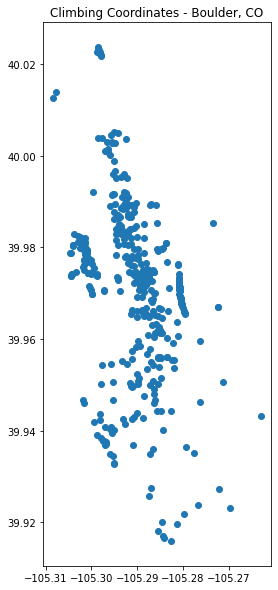

In [6]:
f, ax = plt.subplots(figsize = (10, 10))
boulder_climbing.plot(ax = ax)
ax.set(title = 'Climbing Coordinates - Boulder, CO')

## Create a Base Map

[Text(0.5, 1.0, 'City Limits - Boulder, CO')]

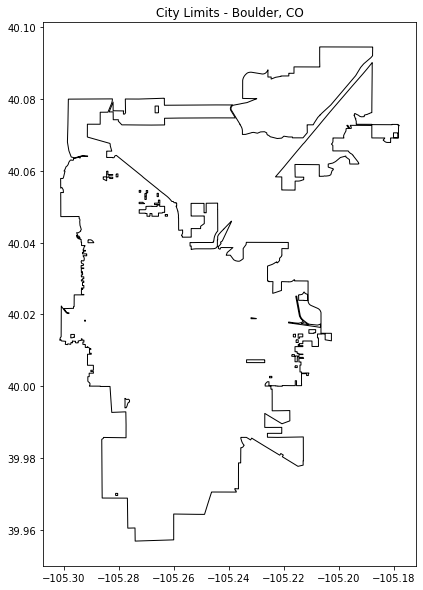

In [7]:
city_limits_path = 'C:/Users/user/earth-analytics/data/earthpy-downloads/City_of_Boulder_City_Limits.geojson'
city_limits = gpd.read_file(city_limits_path)

f, ax = plt.subplots(figsize = (10, 10))
city_limits.plot(ax = ax, color = 'white', edgecolor = 'black')
ax.set(title = 'City Limits - Boulder, CO')

## Plot Two GeoDataFrames Together in the Same Figure

[Text(0.5, 1.0, 'Climbing Locations - Boulder, CO')]

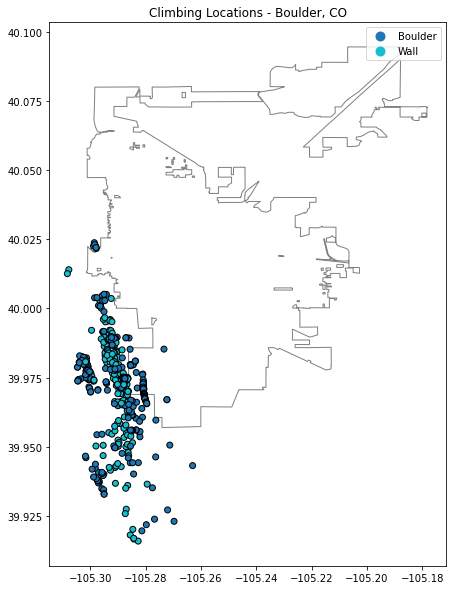

In [8]:
f, ax = plt.subplots(figsize = (10, 10))
city_limits.plot(ax = ax, color = 'white', edgecolor = 'grey')
boulder_climbing.plot(ax = ax, legend = True, column = 'FormationType', edgecolor = 'black')
ax.set(title = 'Climbing Locations - Boulder, CO')

## Clip Climbing Formations to the City of Boulder

In [9]:
boulder_climbing_city = gpd.clip(city_limits, boulder_climbing)

C:\Users\user\AppData\Local\Temp/ipykernel_708/998847305.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  boulder_climbing_city = gpd.clip(city_limits, boulder_climbing)


In [10]:
boulder_climbing_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 4 to 4
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       1 non-null      int64   
 1   TYPE           1 non-null      object  
 2   SHAPESTArea    1 non-null      float64 
 3   SHAPESTLength  1 non-null      float64 
 4   geometry       1 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 48.0+ bytes


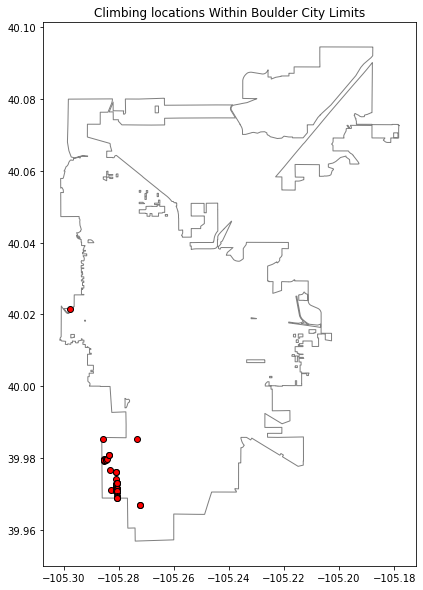

In [11]:
f, ax = plt.subplots(figsize = (10, 10))
city_limits.plot(ax = ax, color = 'white', edgecolor = 'grey')
boulder_climbing_city.plot(ax = ax, color = 'red', edgecolor = 'black')
ax.set(title = 'Climbing locations Within Boulder City Limits')
plt.show()

## Interactive Spatial Maps Using Folium

In [12]:
# Import packages
import folium

# Define coordinates of where we want to center our map
map_center_coords = [40.015, -105.2705]

# Create the map
my_map = folium.Map (location = map_center_coords, zoom_start = 13)

climbing_locations = gpd.GeoDataFrame(data = climb, geometry = coordinates)

In [13]:
# Create the map
for lat, long in zip(climbing_locations.geometry.y, climbing_locations.geometry.x):
    folium.Marker(
        location = [lat, long], 
    ).add_to(my_map)

my_map